In [1]:
# library import
import pandas as pd  # DataFrame support
import numpy as np  # algebra / computations

import matplotlib.pyplot as plt # plotting
import seaborn as sns # fancier plotting


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ASM_1641/train.csv')
df_train.head(100)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,3/14/2016 17:24,3/14/2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991
1,id2377394,1,6/12/2016 0:43,6/12/2016 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074
2,id3858529,2,1/19/2016 11:35,1/19/2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103
3,id3504673,2,4/6/2016 19:32,4/6/2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965
4,id2181028,2,3/26/2016 13:30,3/26/2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962
...,...,...,...,...,...,...,...,...,...,...,...,...
95,id3025098,2,1/20/2016 19:21,1/20/2016 19:31,1,-73.976982,40.750301,-73.999123,40.739510,N,596,2.218567
96,id3333094,2,6/2/2016 23:34,6/2/2016 23:41,1,-73.973465,40.755230,-73.977364,40.742821,N,435,1.418831
97,id2228940,1,2/4/2016 13:22,2/4/2016 13:40,1,-73.981865,40.758774,-73.970222,40.784142,N,1108,2.987226
98,id2102594,1,3/30/2016 16:14,3/30/2016 17:01,1,-73.789841,40.643558,-73.970665,40.687279,N,2824,16.012608


In [ ]:
# overall df info
print('DataFrame Info: ---------------------')
print(df_train.info())

DataFrame Info: ---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048575 non-null  object 
 1   vendor_id           1048575 non-null  int64  
 2   pickup_datetime     1048575 non-null  object 
 3   dropoff_datetime    1048575 non-null  object 
 4   passenger_count     1048575 non-null  int64  
 5   pickup_longitude    1048575 non-null  float64
 6   pickup_latitude     1048575 non-null  float64
 7   dropoff_longitude   1048575 non-null  float64
 8   dropoff_latitude    1048575 non-null  float64
 9   store_and_fwd_flag  1048575 non-null  object 
 10  trip_duration       1048575 non-null  int64  
 11  distance            1048575 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 96.0+ MB
None


In [ ]:
# Checking the statistics of  variable
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.534503e+00,1.664382e+00,-7.397342e+01,4.075094e+01,-7.397336e+01,4.075183e+01,9.621448e+02,3.443005e+00
std,4.988084e-01,1.314261e+00,4.280165e-02,3.381389e-02,4.274282e-02,3.645002e-02,5.853002e+03,4.383354e+00
min,1.000000e+00,0.000000e+00,-7.854740e+01,3.435970e+01,-7.981798e+01,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073738e+01,-7.399131e+01,4.073594e+01,3.970000e+02,1.232403e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075415e+01,-7.397973e+01,4.075455e+01,6.620000e+02,2.095035e+00
75%,2.000000e+00,2.000000e+00,-7.396731e+01,4.076836e+01,-7.396301e+01,4.076984e+01,1.075000e+03,3.877785e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,3.526282e+06,1.241298e+03


In [ ]:
#check missing values
df_train.isnull().sum() # nice, no N/A values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
dtype: int64

In [ ]:
# month (pickup and dropoff)
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])
# day of week
df_train['pickup_day'] = df_train['pickup_datetime'].dt.day_name()
df_train['dropoff_day'] = df_train['dropoff_datetime'].dt.day_name()
#  day of the weekday
df_train['pickup_day_no'] = df_train['pickup_datetime'].dt.weekday
df_train['dropoff_day_no'] = df_train['dropoff_datetime'].dt.weekday
#month
df_train['pickup_month'] = df_train['pickup_datetime'].dt.month_name()
df_train['dropoff_month'] = df_train['dropoff_datetime'].dt.month_name()
# hour
df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_train['dropoff_hour'] = df_train['dropoff_datetime'].dt.hour
# minute of the hour
df_train['pickup_minute'] = df_train['pickup_datetime'].dt.minute
df_train['dropoff_minute'] = df_train['dropoff_datetime'].dt.minute

df_train [['pickup_datetime','dropoff_datetime','pickup_day','dropoff_day','pickup_day_no','dropoff_day_no'
,'pickup_month','dropoff_month','pickup_hour','dropoff_hour','pickup_minute','dropoff_minute']]
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,Monday,0,0,March,March,17,17,24,32
1,id2377394,1,2016-06-12 00:43:00,2016-06-12 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,Sunday,6,6,June,June,0,0,43,54
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,Tuesday,1,1,January,January,11,12,35,10
3,id3504673,2,2016-04-06 19:32:00,2016-04-06 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,Wednesday,2,2,April,April,19,19,32,39
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,Saturday,5,5,March,March,13,13,30,38


Text(0, 0.5, 'No of Trips made')

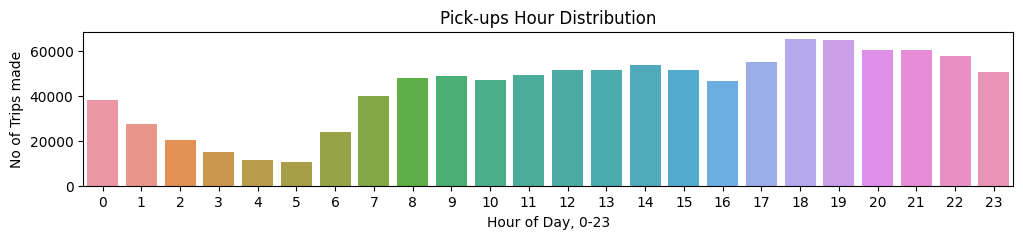

In [ ]:

# pickup time distribution, hour-of-day
plt.figure(figsize=(12,2))

data = df_train.groupby('pickup_hour').aggregate({'id':'count'}).reset_index()
sns.barplot(x='pickup_hour', y='id', data=data)

plt.title('Pick-ups Hour Distribution')
plt.xlabel('Hour of Day, 0-23')
plt.ylabel('No of Trips made')


Text(0, 0.5, 'No of Trips made')

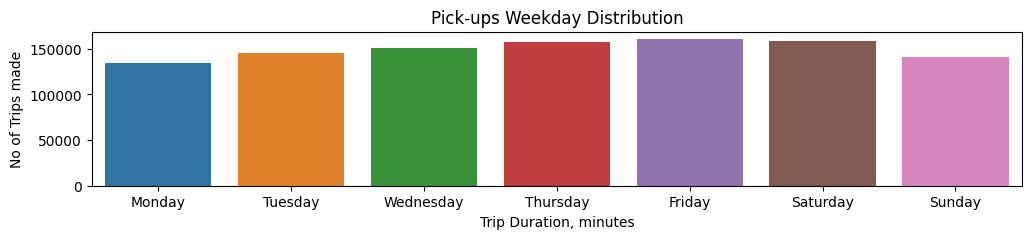

In [ ]:
# month names for plot mapping
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# pickup distribution, by weekday
plt.figure(figsize=(12,2))

data = df_train.groupby('pickup_day_no').aggregate({'id':'count'}).reset_index()
sns.barplot(x='pickup_day_no', y='id', data=data)

plt.title('Pick-ups Weekday Distribution')
plt.xlabel('Trip Duration, minutes')
plt.xticks(range(0,7), day_names, rotation='horizontal')
plt.ylabel('No of Trips made')


Text(0, 0.5, 'No of Trips made')

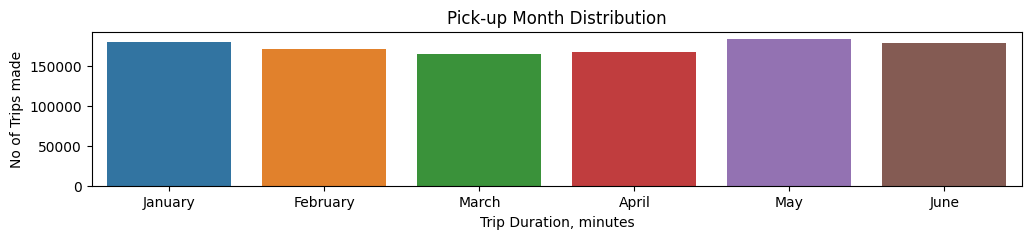

In [ ]:
# month names for plot mapping
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
# pickup distribution, by months
plt.figure(figsize=(12,2))

data = df_train.groupby('pickup_month').aggregate({'id':'count'}).reset_index()
sns.barplot(x='pickup_month', y='id', data=data)

plt.title('Pick-up Month Distribution')
plt.xlabel('Trip Duration, minutes')
plt.xticks(range(0,6), month_names[:6], rotation='horizontal')
plt.ylabel('No of Trips made')

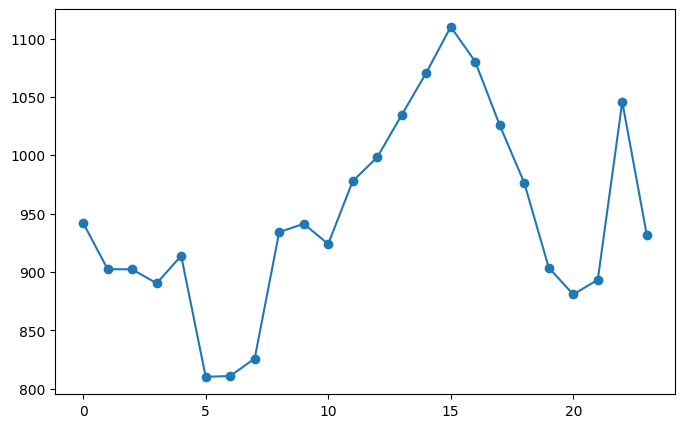

In [ ]:
# Number of trips per hour in each day
avg_duration_hour = df_train.groupby(['pickup_hour'])['trip_duration'].mean().reset_index().rename(columns = {'trip_duration':'avg_trip_duration'})
plt.figure(figsize = (8, 5))
plt.plot(avg_duration_hour['avg_trip_duration'], 'o-')